# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.057305e+01     7.852158e+00
 * time: 0.0021791458129882812
     1     2.929414e+01     6.185124e+00
 * time: 0.008898019790649414
     2     2.164935e+01     7.409635e+00
 * time: 0.016054153442382812
     3     1.797499e+01     7.339578e+00
 * time: 0.02321314811706543
     4     1.268830e+01     3.643025e+00
 * time: 0.03077411651611328
     5     9.972309e+00     1.409449e+00
 * time: 0.039215087890625
     6     9.125747e+00     1.865164e+00
 * time: 0.09784603118896484
     7     8.729482e+00     9.241499e-01
 * time: 0.10288810729980469
     8     8.498592e+00     1.036423e+00
 * time: 0.10776615142822266
     9     8.322621e+00     9.448661e-01
 * time: 0.11252903938293457
    10     8.184384e+00     6.322718e-01
 * time: 0.11722803115844727
    11     8.067115e+00     7.073279e-01
 * time: 0.1220550537109375
    12     7.989056e+00     4.276816e-01
 * time: 0.12703609466552734
    13     7.944203e+00     5.534412e-01
 * time

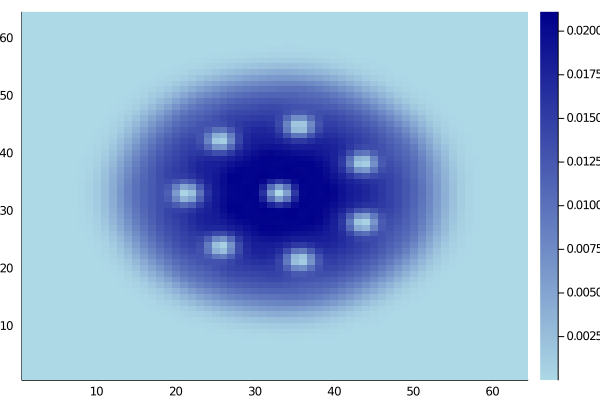

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)